In [107]:
#loading packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#import data sets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [3]:
df_ws.rename(columns={'Goals/90min': 'GpG'}, inplace=True)
df_ws.rename(columns={'DrB (off)': 'DrBoff'}, inplace=True)

In [4]:
df_ws.head()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [5]:
df_ws = df_ws.dropna()

In [6]:
df_ws.describe()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536,...,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536
unique,12536,259,119,209,78,56,546,249,55,52,...,23,45,41,699,35,127,12,33,11,38
top,Hironori Nishi,Undefined,Undefined,Undefined,0.0,Undefined,Undefined,0.00,Undefined,Undefined,...,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0,Undefined,Undefined,Undefined
freq,1,5617,5617,5617,6406,5617,5617,5612,5618,5618,...,5619,5619,5616,5616,5616,5616,5721,5619,5619,5619


In [7]:
df_ws = df_ws.dropna(how='any')

In [8]:
                                                                                                                                                                                                                                                                                                                                                         
#df_ws['Player Name'] = df_ws['Player Name'].str.replace("'", '')

In [125]:
df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea' ]] = df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea']].apply(pd.to_numeric)
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)


In [126]:
df_ws.describe()

,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,...,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,0.438923,0.090391,0.366647,0.025109,0.781247,75.179931,6.633448,1.148068,0.887050,0.929127,...,0.128100,0.707293,0.579091,27.197858,0.275141,1.988222,0.026986,0.334409,0.049342,0.400955
std,5.279474,1.095836,2.861676,0.617253,0.781985,12.830127,0.390793,0.899486,0.844842,0.645789,...,0.245339,0.677156,0.580674,15.335640,0.440288,2.094405,0.075585,0.425575,0.103117,0.486024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.610000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.200000,70.300000,6.360000,0.400000,0.200000,0.500000,...,0.000000,0.100000,0.100000,15.500000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.150000,0.000000,0.600000,77.600000,6.630000,1.000000,0.700000,0.900000,...,0.000000,0.500000,0.400000,26.100000,0.100000,1.400000,0.000000,0.200000,0.000000,0.300000
75%,0.210000,0.110000,0.310000,0.000000,1.100000,82.900000,6.900000,1.700000,1.400000,1.300000,...,0.200000,1.000000,0.900000,37.100000,0.400000,2.800000,0.000000,0.500000,0.100000,0.600000
max,270.000000,90.000000,90.000000,45.000000,7.000000,100.000000,8.990000,8.000000,8.000000,5.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.300000,1.500000,3.700000,1.000000,4.800000


In [11]:
df_tm = df_tm.rename(columns={'Current.market.value': 'current_market_value', 'Current.club': 'current_club','Highest.market.value': 'highest_market_value', 'Place.of.birth': 'place_of_birth', 'Date.of.birth': 'date_of_birth', 'Country.of.birth': 'country_of_birth','Continent.specific': 'continent_specific'})

In [12]:
df_tmh = df_tm.sort_values('highest_market_value', ascending=False)
df_tmh = df_tmh[df_tmh['highest_market_value'] >= 1000000]

In [13]:
df_tmh.loc[df_tm['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_tmh.loc[df_tm['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_tmh.loc[df_tm['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [14]:
#there are definitely issues here bc of different name for same person. need to use solution for 98% match or use dob 
#scraped from transfermarkt
df = pd.merge(left=df_tmh, right=df_ws, left_on='Name', right_on='Player Name')

In [15]:
df['west_african'] = np.where(df['continent_specific']=="West Africa", 'yes', 'no')

In [16]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,4004.000000,123.000000,4.012000e+03,4.012000e+03,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,...,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000,4012.000000
mean,1.816673,9.869919,4.872284e+06,7.070837e+06,0.392450,0.085344,0.330785,0.024731,0.899900,76.667846,...,0.148255,0.755932,0.665354,30.242049,0.310793,2.155359,0.034521,0.383425,0.057478,0.463734
std,0.066648,1.188809,8.381368e+06,9.815630e+06,5.013613,0.161533,2.310567,0.719607,0.851614,11.474218,...,0.264522,0.695035,0.622748,15.740096,0.477732,2.106387,0.084011,0.460190,0.108301,0.526172
min,1.600000,7.500000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.000000e+06,1.975000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.100000,...,0.000000,0.200000,0.200000,18.400000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.820000,10.000000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.700000,...,0.000000,0.600000,0.500000,29.000000,0.100000,1.600000,0.000000,0.300000,0.000000,0.300000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.260000,0.130000,0.320000,0.000000,1.300000,83.900000,...,0.200000,1.100000,1.000000,40.500000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000
max,2.030000,13.000000,1.200000e+08,1.200000e+08,270.000000,2.900000,90.000000,45.000000,7.000000,100.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.000000,1.300000,3.700000,1.000000,4.800000


In [17]:
df.head(n=100)

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african
0,Cristiano Ronaldo,"Feb 5, 1985","Funchal, Portugal",32,1.85,NaN,Portugal,Striker,both,Real Madrid,...,0.6,1.6,28.0,0.3,0.5,0.2,1.6,0.7,4.8,no
1,Lionel Messi,"Jun 24, 1987","Rosario, Argentina",30,1.70,8.5,"Argentina, Spain",Striker,left,FC Barcelona,...,3.5,2.2,53.3,0.4,2.4,0.4,2.7,0.4,2.9,no
2,Neymar,"Feb 5, 1992","Mogi das Cruzes, Brazil",25,1.75,NaN,Brazil,Striker,both,Paris Saint-Germain,...,3.5,3.8,61.2,1.2,2.1,1.3,1.5,0.1,2.0,no
3,Luis Suarez,"Jan 24, 1987","Salto, Uruguay",30,1.82,NaN,Uruguay,Striker,right,FC Barcelona,...,1.5,0.9,31.1,0.0,1.3,0.2,0.9,0.5,2.6,no
4,Gareth Bale,"Jul 16, 1989","Cardiff, Wales",28,1.83,NaN,Wales,Striker,left,Real Madrid,...,0.6,2.7,27.6,0.7,1.6,0.0,0.3,0.3,2.3,no
5,James Rodriguez,"Jul 12, 1991","Cucuta, Colombia",26,1.80,NaN,Colombia,Midfielder,left,Bayern Munich,...,0.9,2.4,48.2,1.5,3.7,0.5,0.7,0.0,0.7,no
6,Paul Pogba,"Mar 15, 1993","Lagny-sur-Marne, France",24,1.91,NaN,"France, Guinea",Midfielder,both,Manchester United,...,2.2,1.8,65.2,0.0,3.0,0.4,1.8,0.2,1.4,no
7,Antoine Griezmann,"Mar 21, 1991","Macon, France",26,1.75,NaN,France,Striker,left,Atletico Madrid,...,0.8,1.4,26.2,0.4,0.6,0.1,0.9,0.1,1.4,no
8,Robert Lewandowski,"Aug 21, 1988","Warszawa, Poland",29,1.84,NaN,Poland,Striker,right,Bayern Munich,...,1.1,1.3,22.5,0.1,0.5,0.0,1.1,0.4,2.7,no
9,Gonzalo Higuain,"Dec 10, 1987","Brest, France",29,1.84,NaN,"Argentina, France",Striker,right,Juventus FC,...,2.2,1.1,21.1,0.0,1.5,0.2,0.7,0.1,2.1,no


In [18]:
df = df.sort_values('GpG', ascending=False)
df = df[df['GpG'] < 5]
df = df[df['Yel/90min'] < 5]
df = df[df['Red/90min'] < 5]

In [19]:
rat_bins=[5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]
df['binned_values'] = np.digitize(df.Rating.values, bins=rat_bins)  

In [20]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,3969.000000,120.000000,3.977000e+03,3.977000e+03,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,...,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000
mean,1.816755,9.870833,4.890660e+06,7.086912e+06,0.202914,0.085157,0.240184,0.012125,0.904727,76.739678,...,0.759065,0.669877,30.461353,0.312824,2.173196,0.034825,0.386120,0.057858,0.465502,17.740759
std,0.066575,1.199607,8.409363e+06,9.836757e+06,0.386825,0.155861,0.364082,0.067103,0.852339,11.166249,...,0.692671,0.622925,15.625865,0.478782,2.106830,0.084317,0.460654,0.108419,0.526569,3.858726
min,1.600000,7.500000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.000000e+06,2.000000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.100000,...,0.200000,0.200000,18.700000,0.000000,0.600000,0.000000,0.000000,0.000000,0.100000,15.000000
50%,1.820000,10.000000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.700000,...,0.600000,0.500000,29.200000,0.100000,1.600000,0.000000,0.300000,0.000000,0.300000,18.000000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.260000,0.130000,0.320000,0.000000,1.300000,83.800000,...,1.100000,1.000000,40.600000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000,20.000000
max,2.030000,13.000000,1.200000e+08,1.200000e+08,4.550000,2.900000,4.220000,2.000000,7.000000,100.000000,...,5.100000,4.200000,101.200000,3.300000,14.000000,1.300000,3.700000,1.000000,4.800000,40.000000


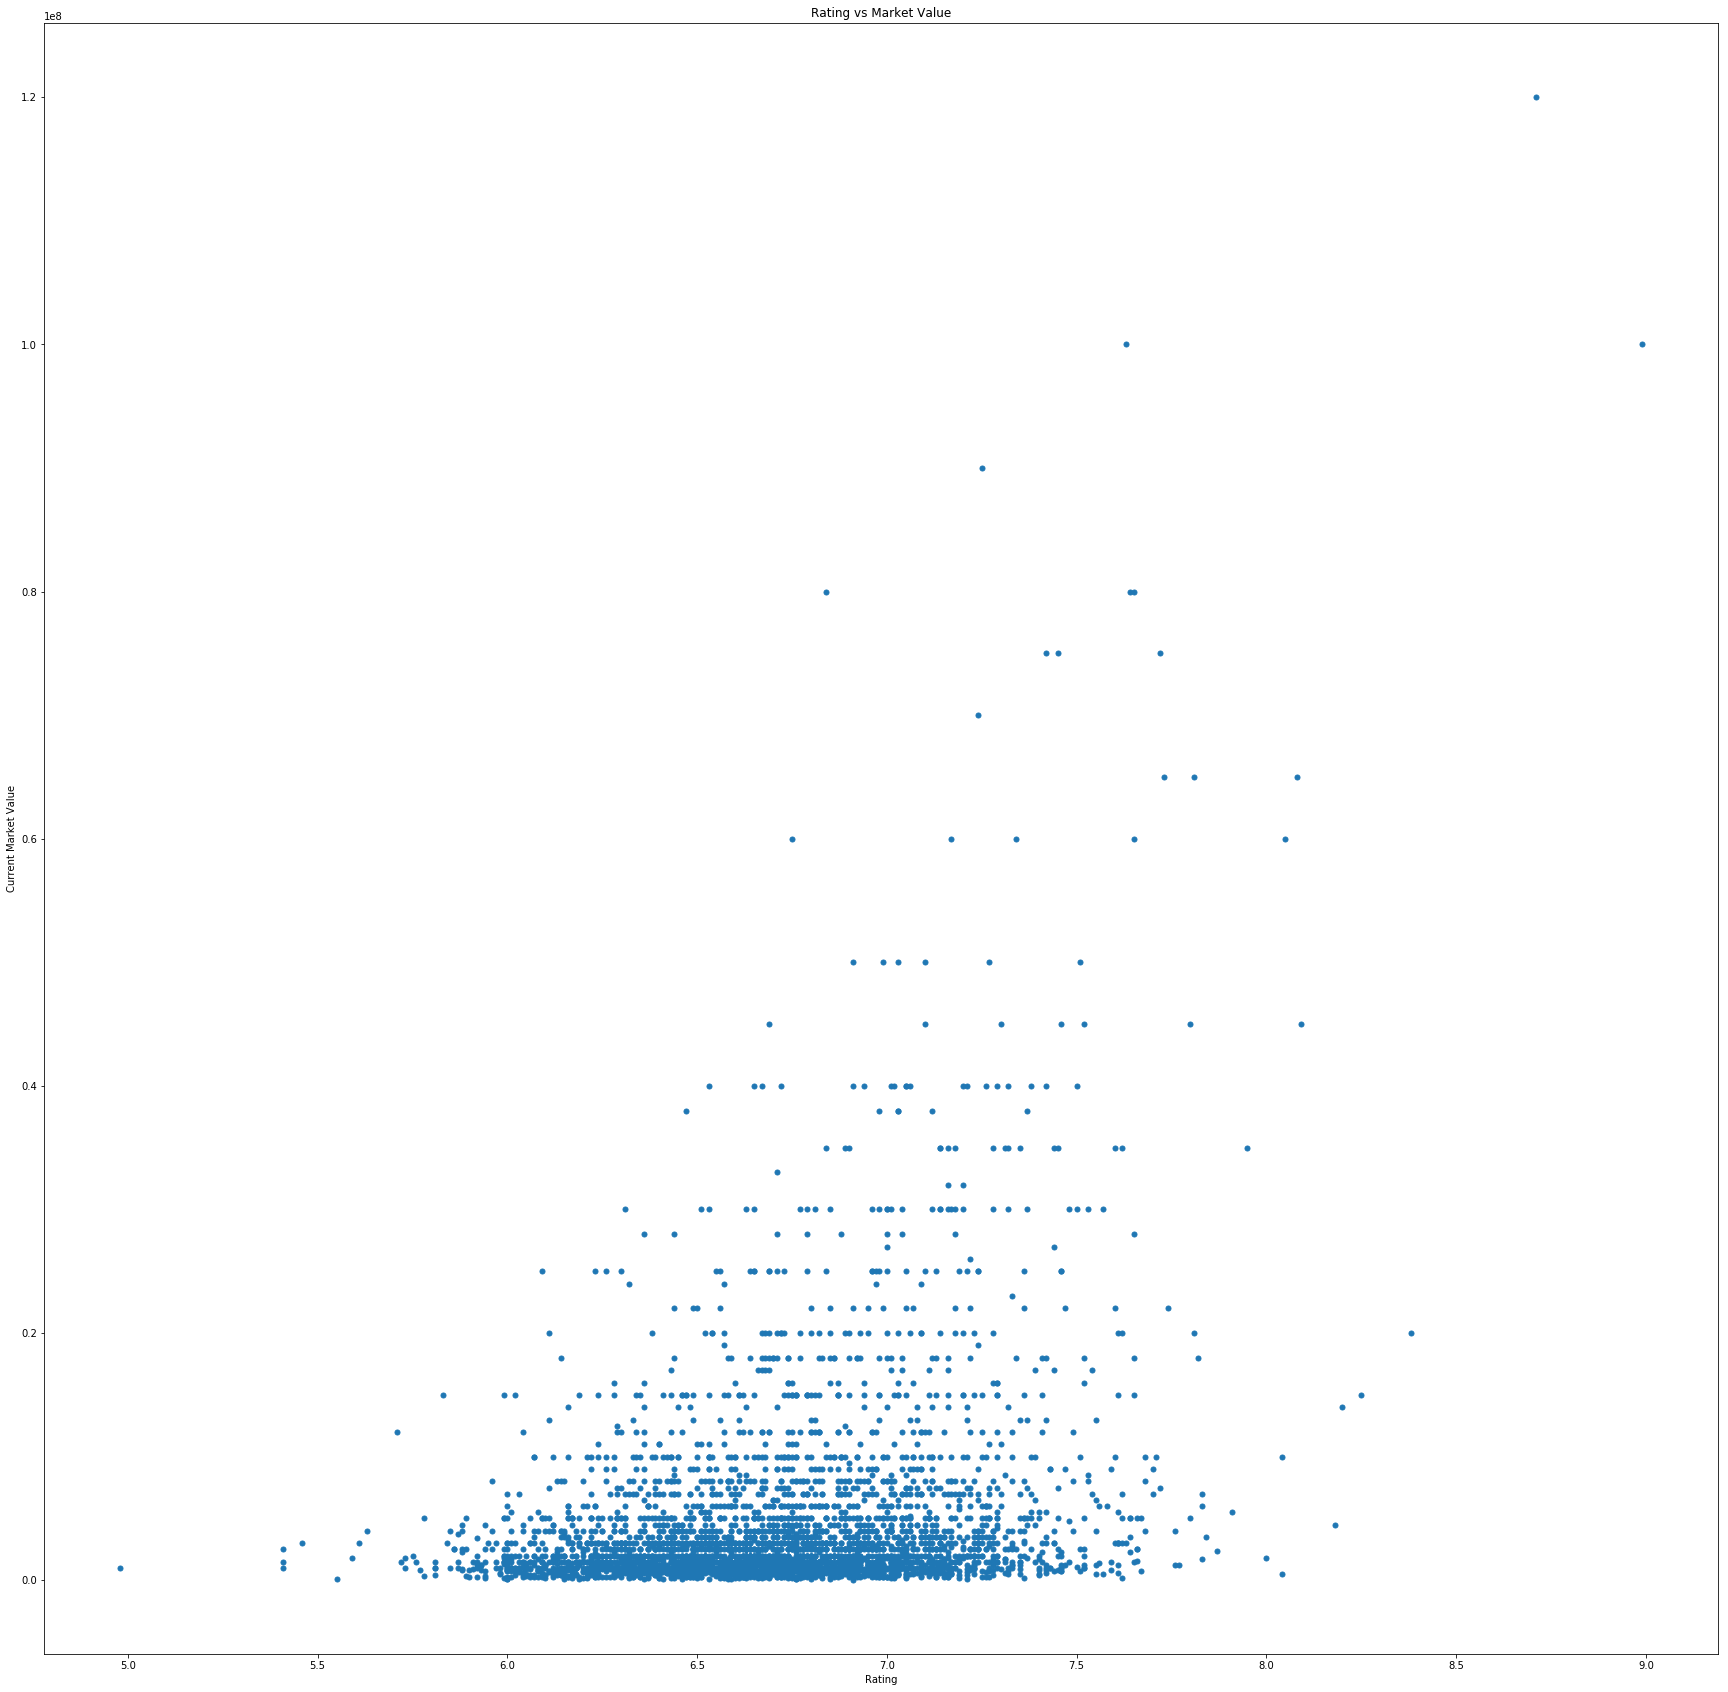

In [21]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value')
plt.show()

In [22]:
df['GpG'].corr(df['Rating'])


0.098073957525314281

In [23]:
df['Rating'].corr(df['current_market_value'])

0.29779441942859336

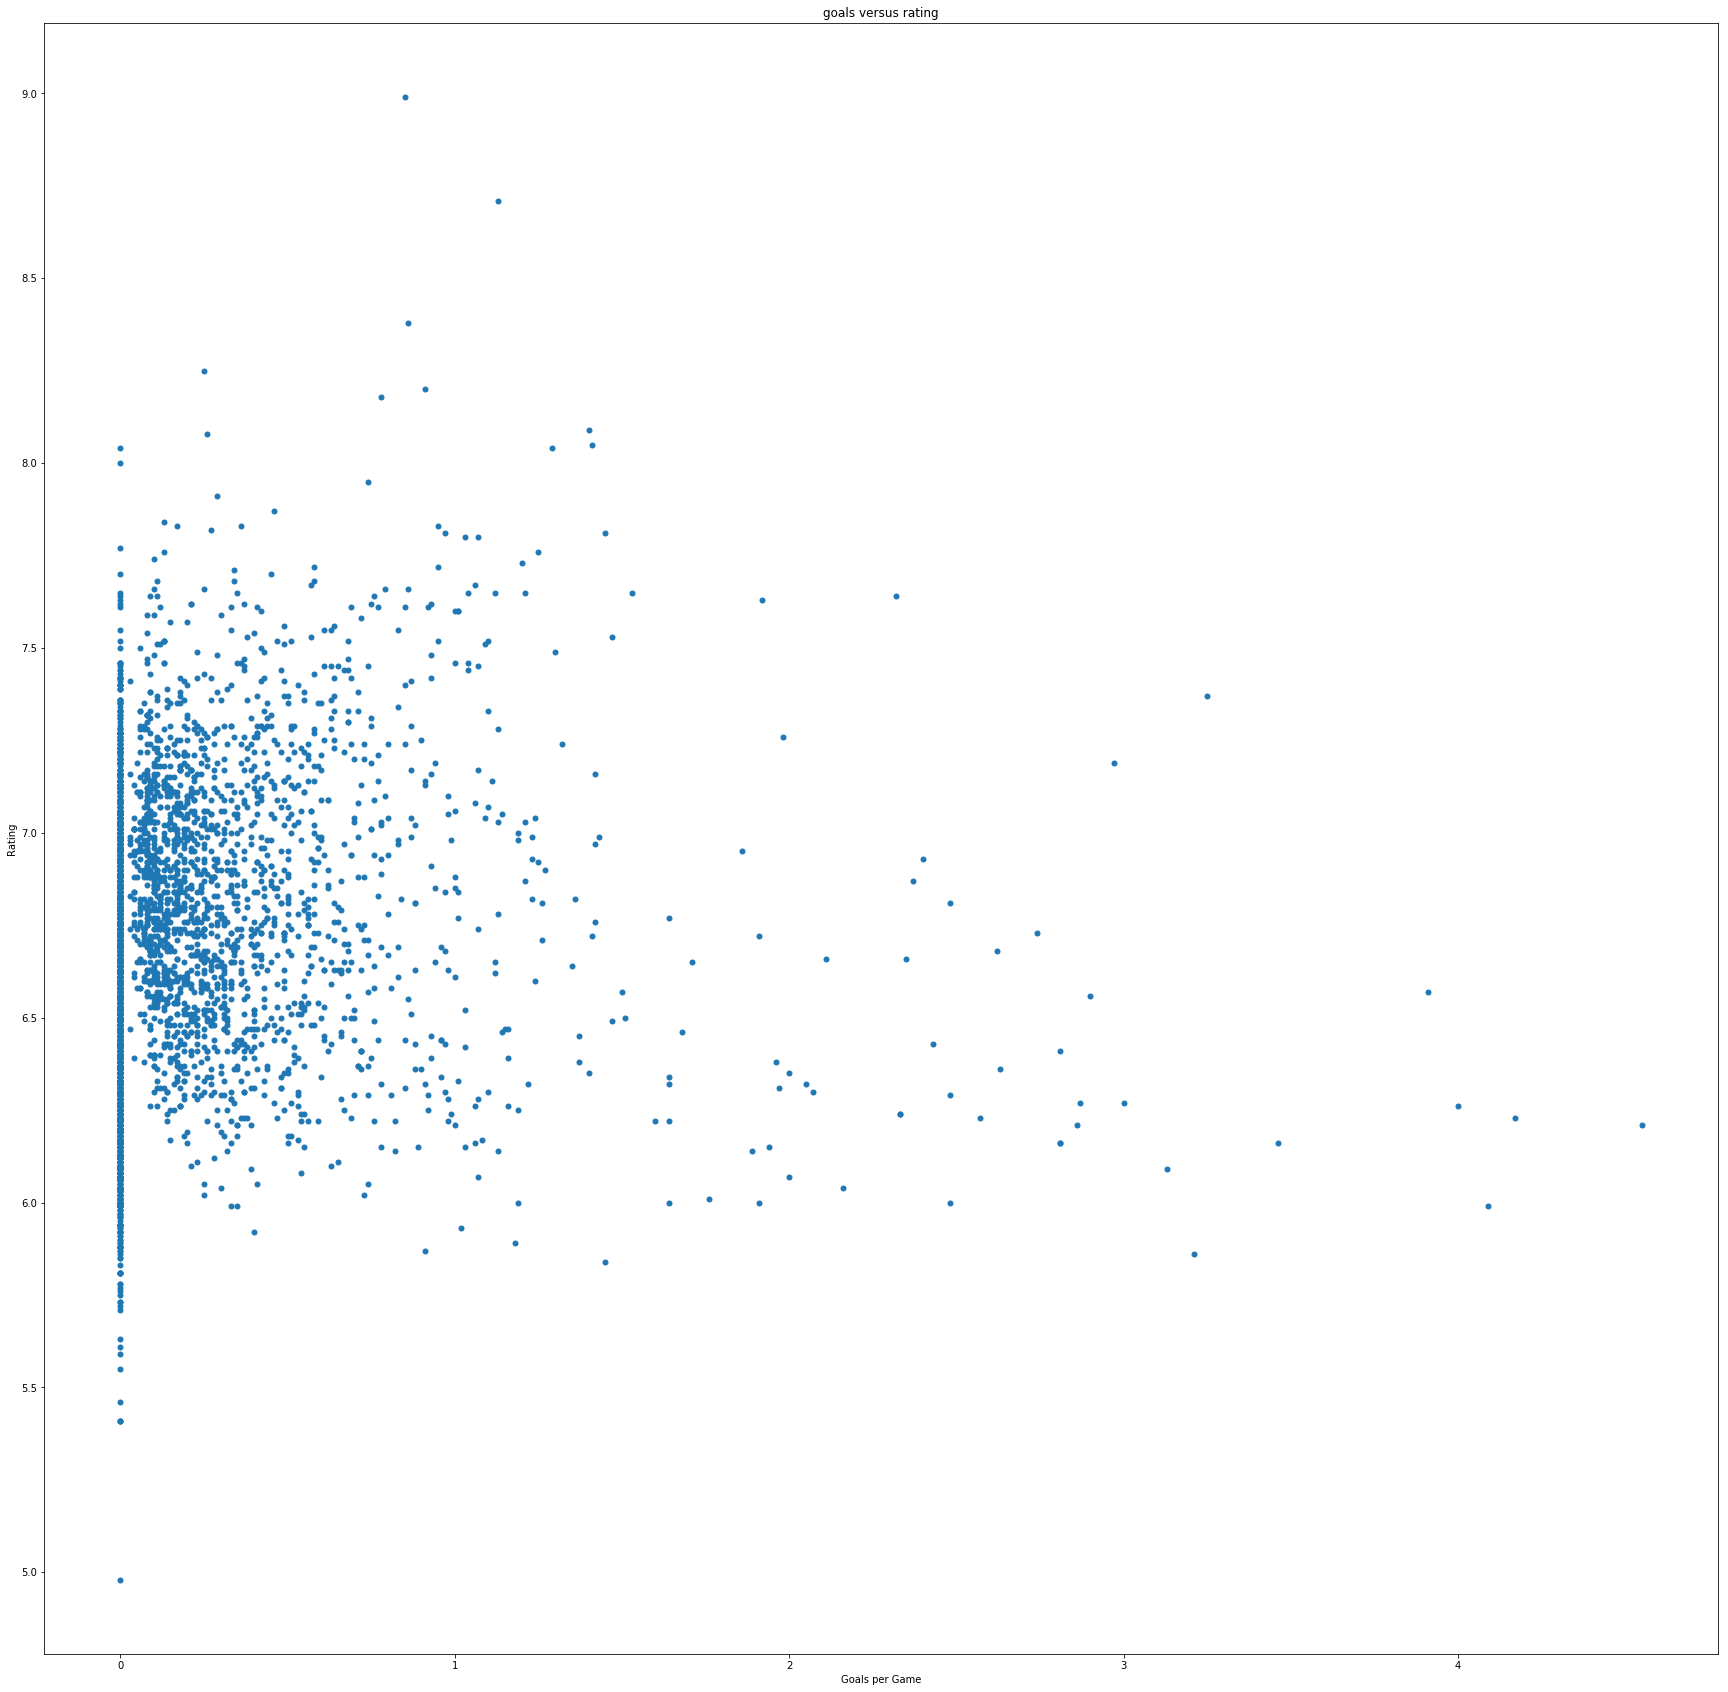

In [24]:
plt.figure(figsize=(30,30))
plt.plot('GpG', 'Rating', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Goals per Game')
plt.ylabel('Rating')
plt.title('goals versus rating')
plt.show()


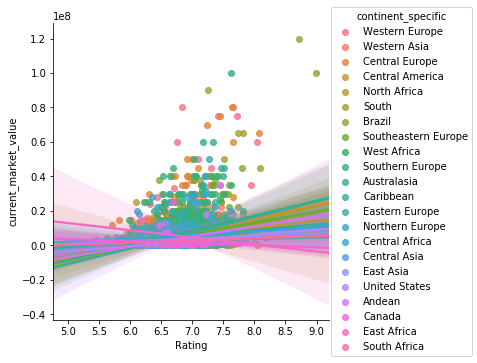

In [25]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="continent_specific", data=df)

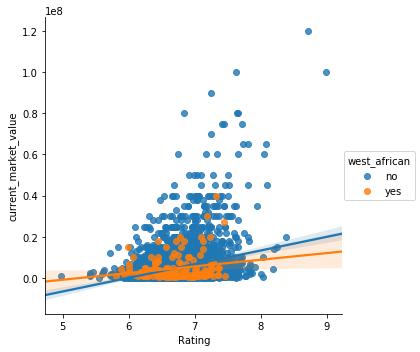

In [26]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df)

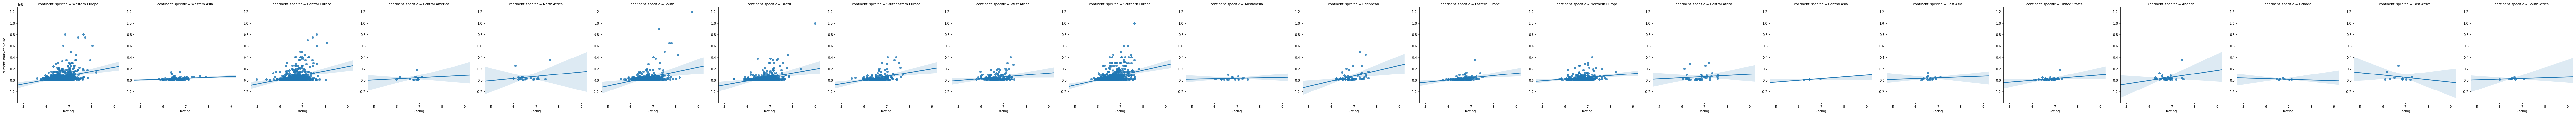

In [27]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", data=df)

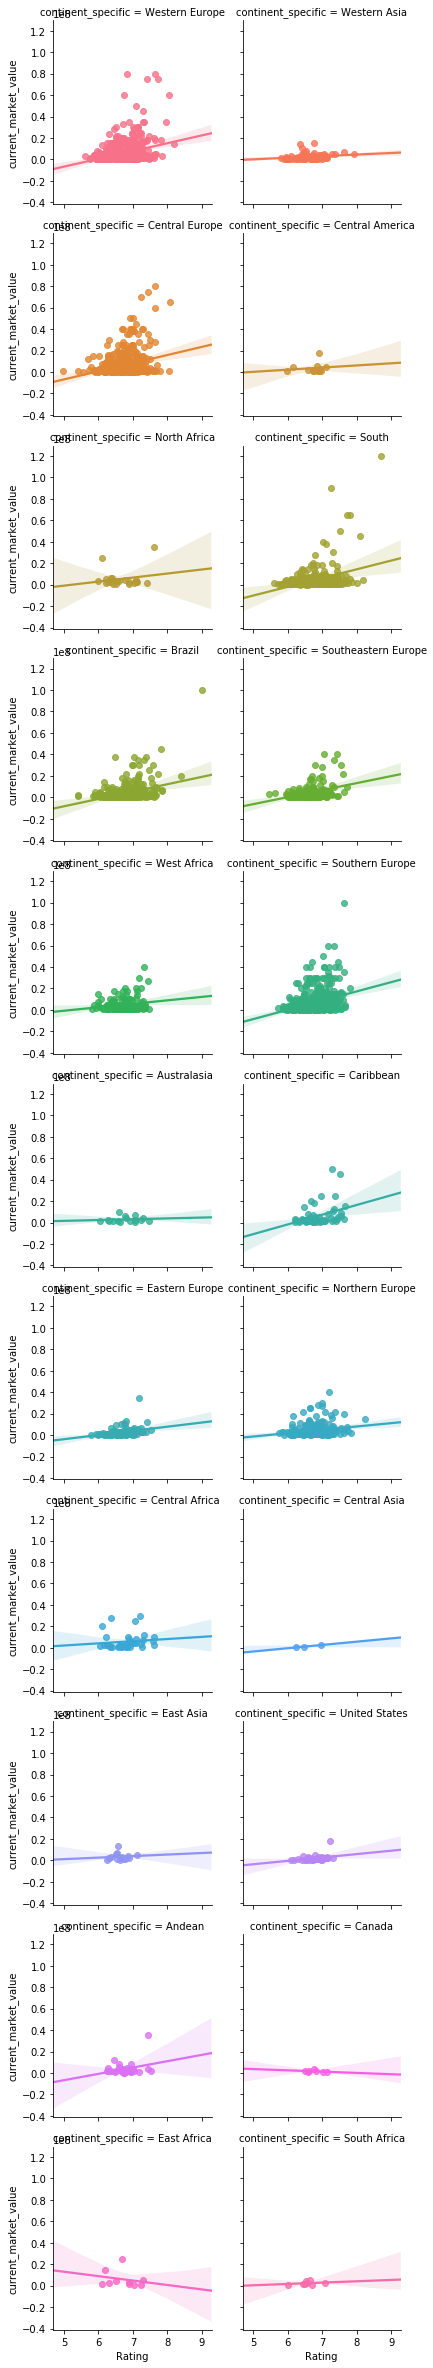

In [28]:
g = sns.lmplot(x="Rating", y="current_market_value", col="continent_specific", hue="continent_specific",
               data=df, col_wrap=2, size=3)

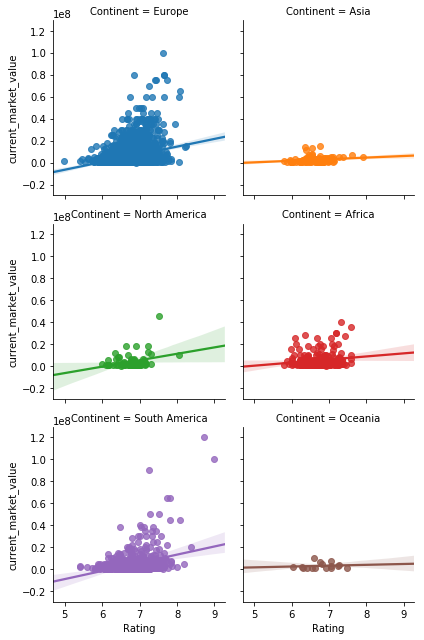

In [29]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Continent", hue="Continent",
               data=df, col_wrap=2, size=3)

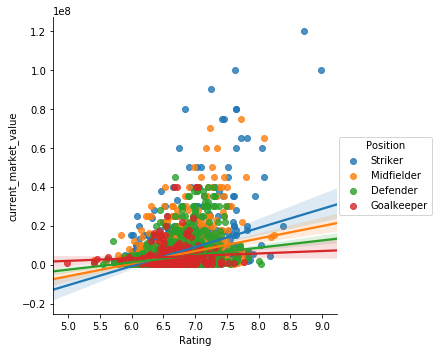

In [30]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df)

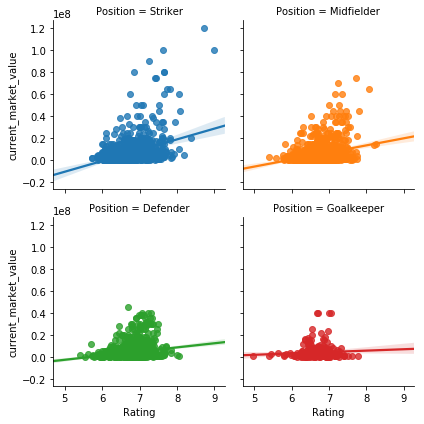

In [31]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Position", hue="Position",
               data=df, col_wrap=2, size=3)

In [32]:
df.dtypes

Name                     object
date_of_birth            object
place_of_birth           object
Age                      object
Height                  float64
Shoe.size               float64
Nationality              object
Position                 object
Foot                     object
current_club             object
current_market_value    float64
highest_market_value    float64
City.of.birth            object
country_of_birth         object
Birth.country.code       object
Continent                object
continent_specific       object
Player Name              object
GpG                     float64
Assists/90min           float64
Yel/90min               float64
Red/90min               float64
SpG                     float64
PS%                     float64
Rating                  float64
Tackles                 float64
Inter                   float64
Fouls (def)             float64
Offsides                float64
Clear                   float64
DrB (def)               float64
Blocks  

In [33]:
#df_wa = df[df['place_of_birth'].isin(["Senegal", "Cote d'Ivoire", "Cape Verde", "Cameroon", "Democratic Republic of Congo", "Nigeria", "Benin", "Equatorial Guinea", "Burkina Faso", "Ghana", "Gambia"])]
#df_test = df[df['place_of_birth'].isin(["Brazil", "Colombia"])]


In [34]:
wa_country_list = ["Senegal", "Cote d'Ivoire", "Cape Verde", "Cameroon", "Democratic Republic of Congo", "Nigeria", "Benin", "Equatorial Guinea", "Burkina Faso", "Ghana", "Gambia"]
df_wa = df[df.country_of_birth.isin(wa_country_list)]

In [35]:
df_wa.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,105.000000,0.0,1.050000e+02,1.050000e+02,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1.810952,NaN,4.402857e+06,6.442381e+06,0.301143,0.061048,0.249524,0.012095,1.096190,76.835238,...,1.002857,0.576190,27.734286,0.145714,1.820000,0.026667,0.360000,0.092381,0.641905,17.657143
std,0.064963,NaN,5.865204e+06,6.730255e+06,0.472907,0.110218,0.288465,0.042915,0.888703,9.334407,...,0.820115,0.472824,14.507364,0.238597,2.040852,0.066891,0.323027,0.132792,0.672936,3.782115
min,1.680000,NaN,4.000000e+05,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.760000,NaN,1.000000e+06,2.000000e+06,0.000000,0.000000,0.070000,0.000000,0.400000,71.400000,...,0.400000,0.200000,17.600000,0.000000,0.400000,0.000000,0.100000,0.000000,0.100000,15.000000
50%,1.800000,NaN,2.500000e+06,4.000000e+06,0.130000,0.000000,0.170000,0.000000,0.900000,77.800000,...,0.900000,0.500000,27.400000,0.100000,1.000000,0.000000,0.300000,0.000000,0.400000,17.000000
75%,1.850000,NaN,5.000000e+06,8.000000e+06,0.410000,0.100000,0.360000,0.000000,1.700000,83.600000,...,1.400000,0.900000,34.700000,0.200000,2.700000,0.000000,0.600000,0.100000,1.000000,20.000000
max,1.980000,NaN,4.000000e+07,4.000000e+07,2.630000,0.520000,1.640000,0.310000,3.900000,95.400000,...,3.400000,2.200000,81.400000,1.500000,11.000000,0.300000,1.500000,0.500000,3.000000,27.000000


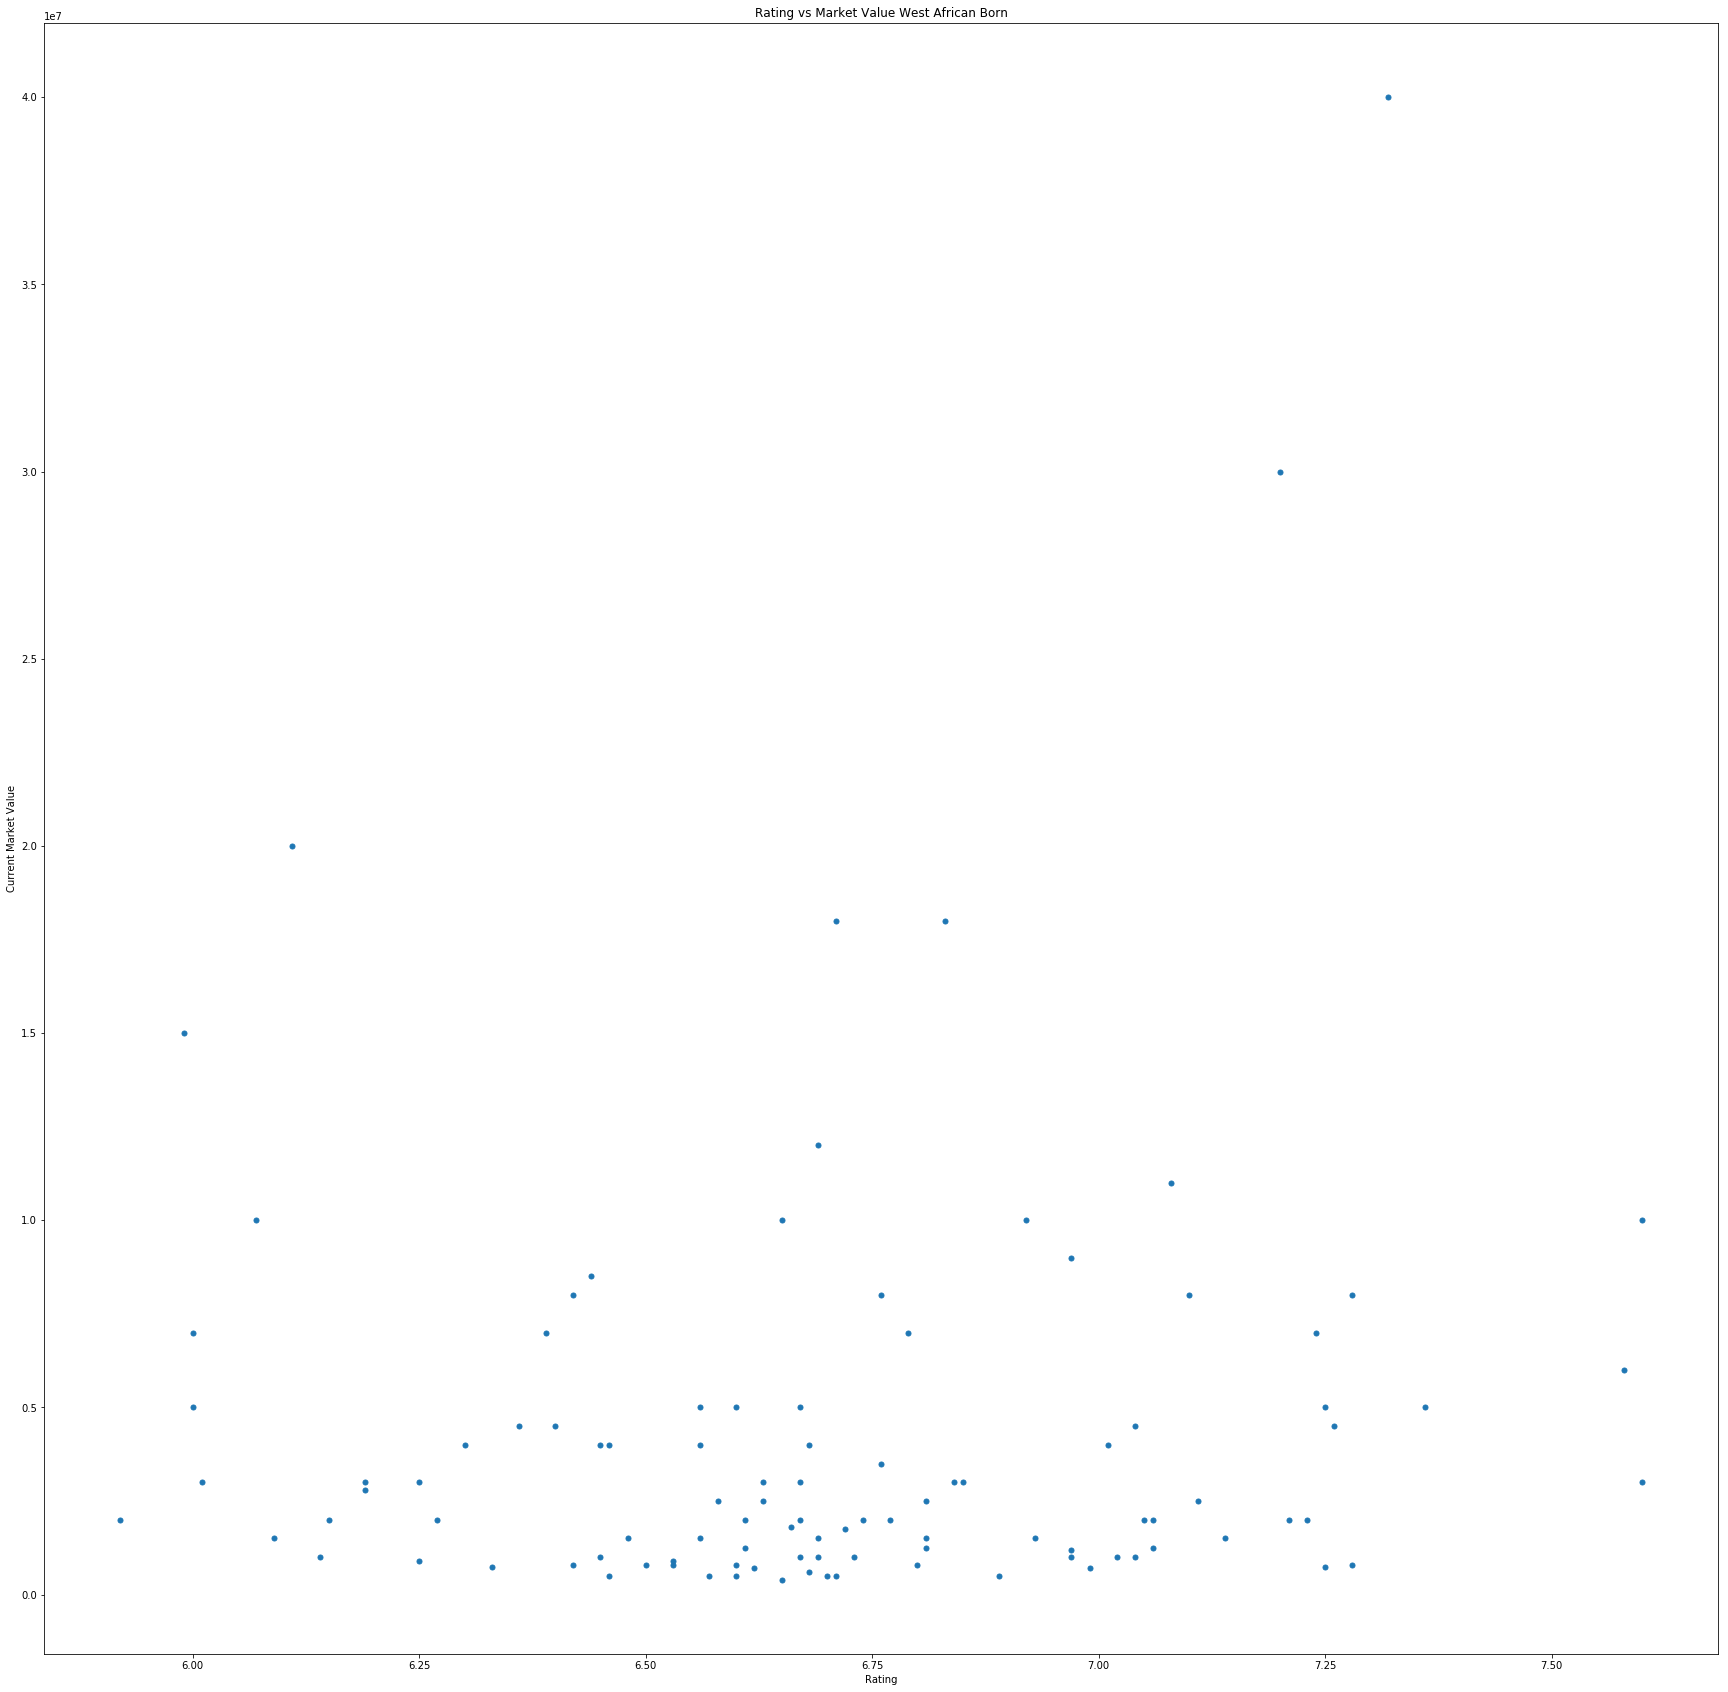

In [36]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_wa, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value West African Born')
plt.show()

In [37]:
df_wa['Rating'].corr(df_wa['current_market_value'])

0.13171741539266679

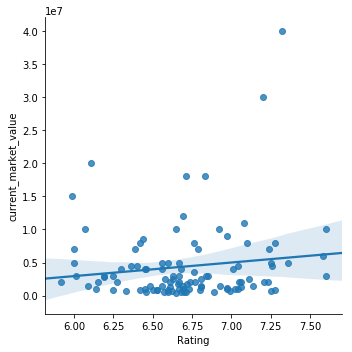

In [38]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_wa)

In [39]:
striker = ['Striker']
df_st = df[df.Position.isin(striker)]

In [40]:
df_st.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values
2355,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,0.1,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13
3418,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,1.3,14.0,0.0,0.0,0.0,0.3,0.0,0.7,no,13
1599,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,0.0,3.3,0.0,0.3,0.0,0.5,0.0,0.0,no,10
2101,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,0.3,6.8,0.0,0.0,0.0,0.0,0.3,0.8,no,16
1215,Munas Dabbur,"May 14, 1992","Nazareth, Israel",25,1.82,NaN,Israel,Striker,right,Red Bull Salzburg,...,1.3,34.8,0.0,1.0,0.3,1.5,0.0,2.0,no,24


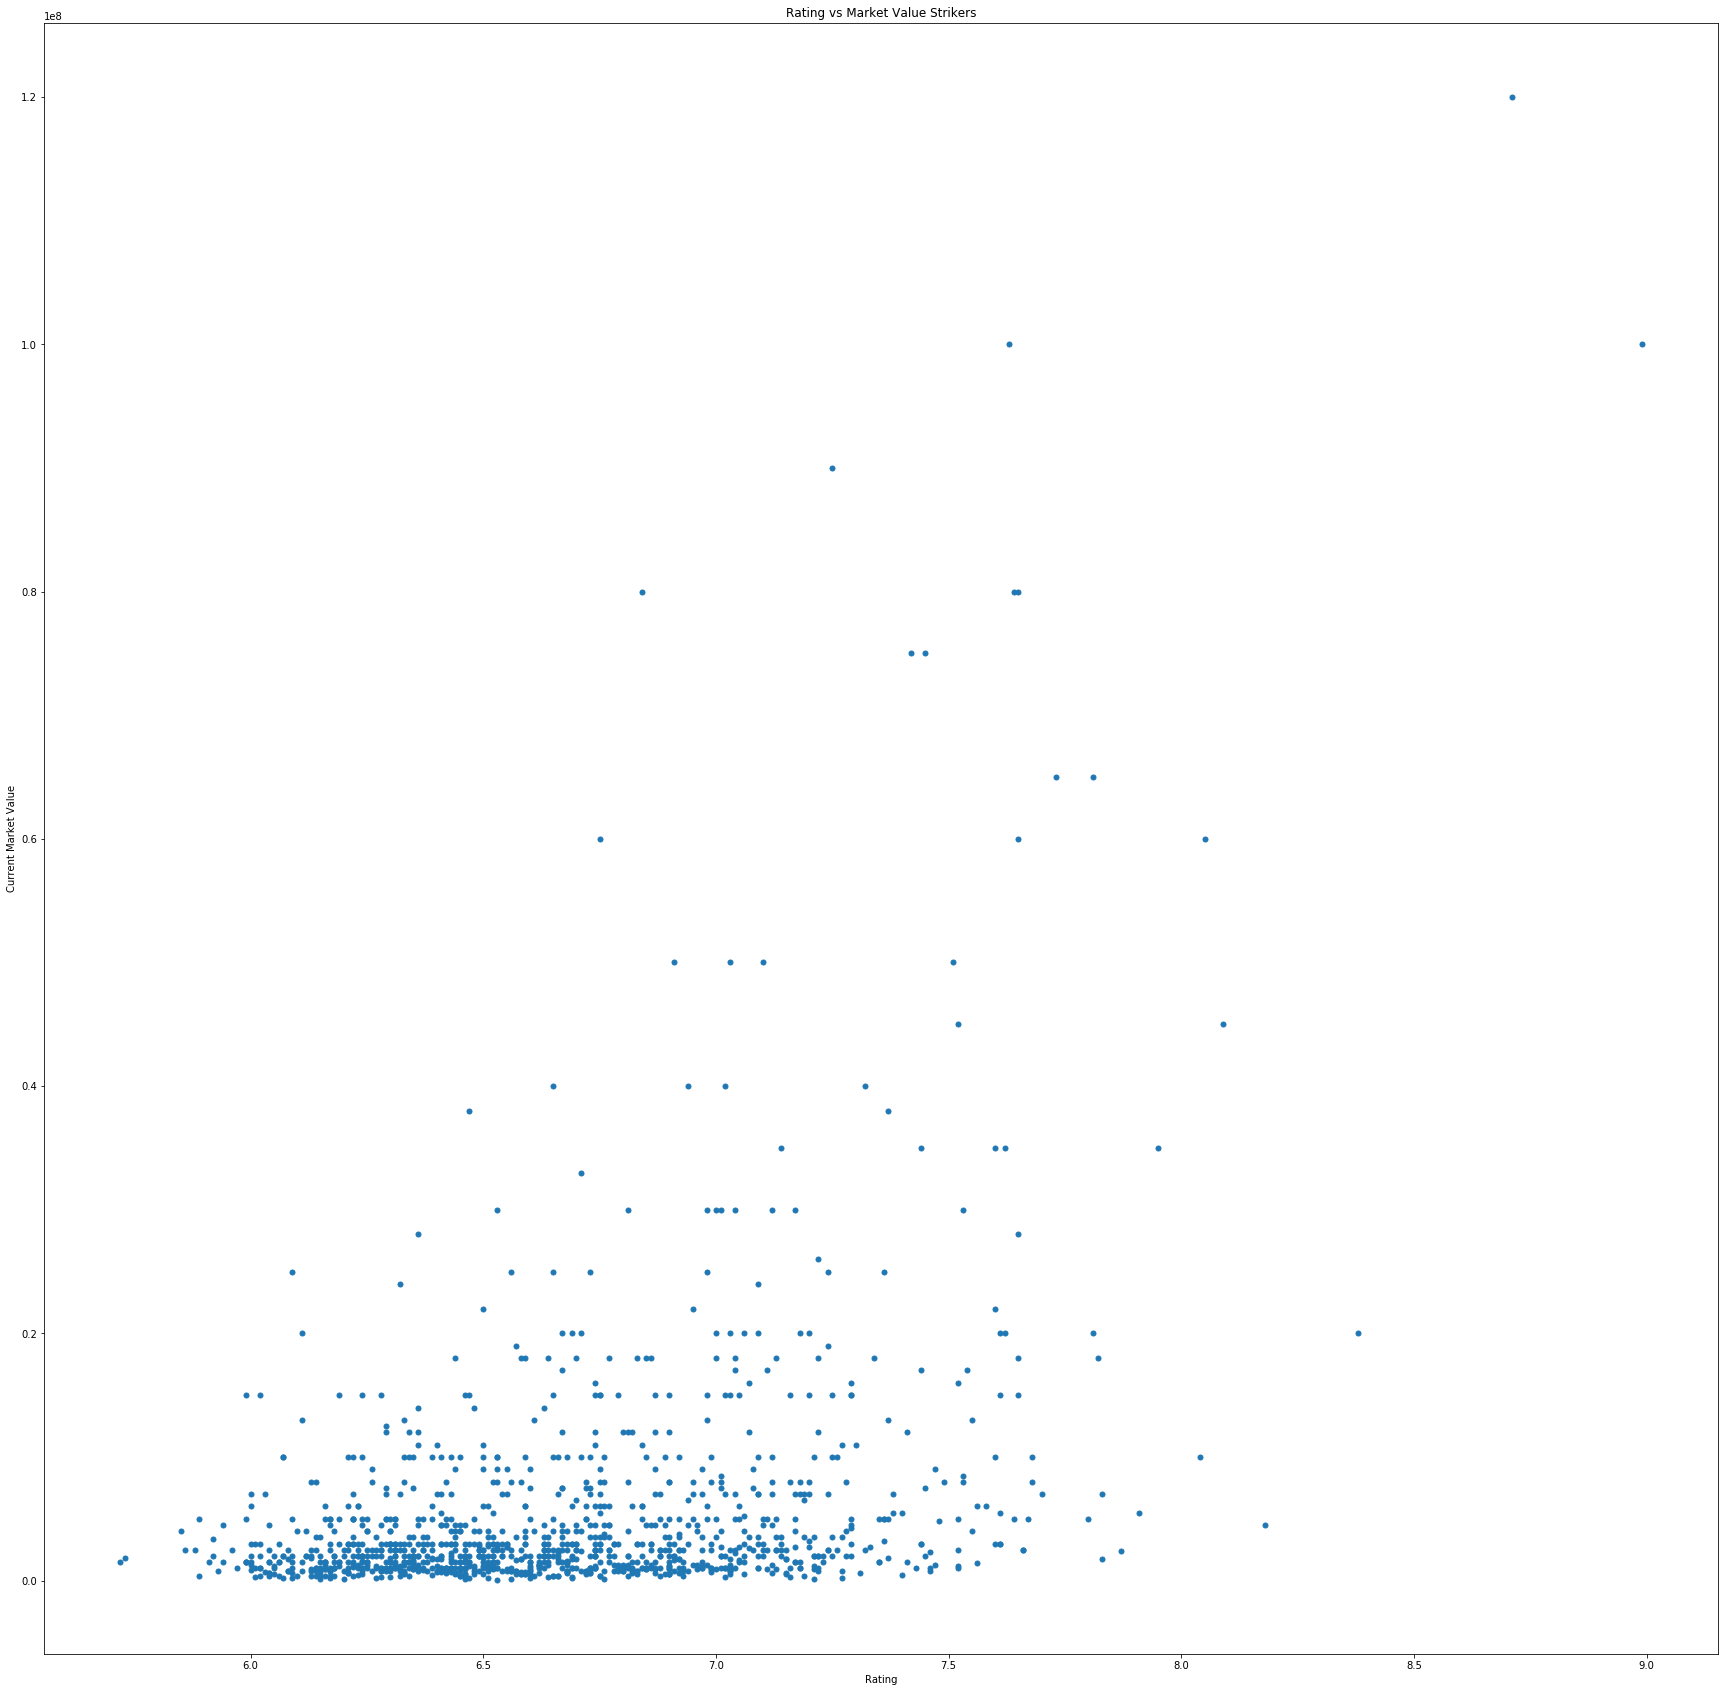

In [41]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_st, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value Strikers')
plt.show()

In [42]:
#need to create column with flag for w african born or not 

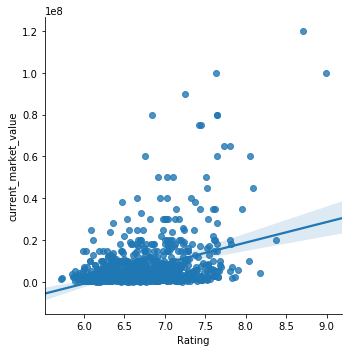

In [43]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_st)

In [44]:
df_st['Rating'].corr(df_st['current_market_value'])

0.3925902192663161

In [45]:
df_wa_st = df_st[df_st.country_of_birth.isin(wa_country_list)]

In [46]:
df_wa_st.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,49.000000,0.0,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.804286,NaN,5.222449e+06,6.922449e+06,0.536122,0.091633,0.267551,0.005306,1.679592,72.387755,...,1.546939,0.734694,17.708163,0.163265,0.522449,0.038776,0.444898,0.144898,1.085714,17.653061
std,0.059442,NaN,6.762443e+06,7.356283e+06,0.584319,0.122361,0.368593,0.023814,0.846064,8.631402,...,0.796111,0.478518,8.341534,0.259562,0.498441,0.083707,0.331072,0.148690,0.639987,4.589622
min,1.720000,NaN,4.000000e+05,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.200000,49.000000,...,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.760000,NaN,1.250000e+06,2.000000e+06,0.190000,0.000000,0.000000,0.000000,1.000000,67.300000,...,1.000000,0.400000,10.900000,0.000000,0.100000,0.000000,0.200000,0.000000,0.700000,14.000000
50%,1.800000,NaN,3.000000e+06,4.000000e+06,0.410000,0.000000,0.100000,0.000000,1.700000,74.700000,...,1.400000,0.700000,17.100000,0.100000,0.400000,0.000000,0.400000,0.100000,1.000000,17.000000
75%,1.840000,NaN,7.000000e+06,1.000000e+07,0.630000,0.150000,0.350000,0.000000,2.100000,78.400000,...,2.100000,1.000000,22.800000,0.200000,0.800000,0.000000,0.600000,0.200000,1.400000,21.000000
max,1.980000,NaN,4.000000e+07,4.000000e+07,2.630000,0.450000,1.640000,0.150000,3.900000,89.700000,...,3.400000,2.200000,34.600000,1.500000,2.500000,0.300000,1.500000,0.500000,3.000000,27.000000


In [47]:
df_wa_st['Rating'].corr(df_wa_st['current_market_value'])

0.10505587292379795

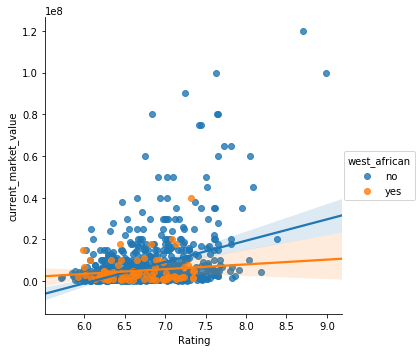

In [48]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_st)

In [49]:
#now I want to remove the outliers and look again 

In [50]:
df_adjusted = df[df['current_market_value'] <= 30000000]

In [51]:
df_adjusted.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,3893.000000,114.000000,3.901000e+03,3.901000e+03,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,...,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000
mean,1.816835,9.842105,4.037466e+06,6.218572e+06,0.196921,0.082463,0.241277,0.012130,0.884312,76.629582,...,0.752192,0.656627,30.163368,0.310997,2.157242,0.032786,0.379826,0.056447,0.452704,17.629326
std,0.066474,1.183058,5.252099e+06,7.198627e+06,0.381594,0.154248,0.366377,0.067611,0.820759,11.192225,...,0.687462,0.610385,15.351675,0.478426,2.097934,0.078702,0.453257,0.106615,0.504672,3.762569
min,1.600000,7.500000,5.000000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.000000e+06,1.800000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.100000,...,0.200000,0.200000,18.500000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,1.820000,9.750000,2.000000e+06,3.500000e+06,0.000000,0.000000,0.170000,0.000000,0.700000,78.600000,...,0.600000,0.500000,29.000000,0.100000,1.600000,0.000000,0.300000,0.000000,0.300000,18.000000
75%,1.860000,10.500000,4.500000e+06,7.500000e+06,0.250000,0.120000,0.320000,0.000000,1.300000,83.800000,...,1.100000,1.000000,40.400000,0.400000,3.000000,0.000000,0.600000,0.100000,0.700000,20.000000
max,2.030000,13.000000,3.000000e+07,7.000000e+07,4.550000,2.900000,4.220000,2.000000,5.600000,100.000000,...,5.100000,4.200000,101.100000,3.300000,14.000000,1.000000,3.700000,1.000000,3.900000,34.000000


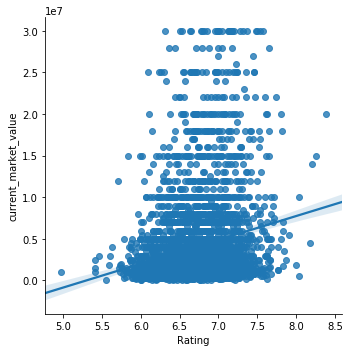

In [52]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_adjusted)

In [53]:
df_adjusted['Rating'].corr(df_adjusted['current_market_value'])

0.20497268138736349

In [54]:
#taken out outliers and looking by bins
Avg_adj=df_adjusted.groupby(['binned_values','west_african'], as_index=False)['current_market_value'].mean()

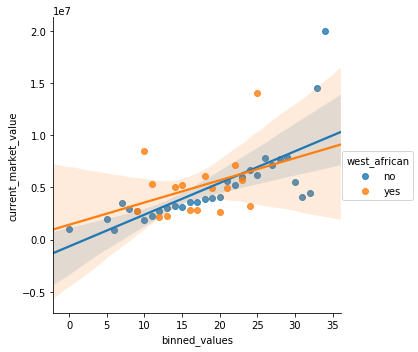

In [55]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="west_african",data=Avg_adj)
plt.show()

In [56]:
df_adjusted['SpG'].corr(df_adjusted['Rating'])

0.38397676284571058

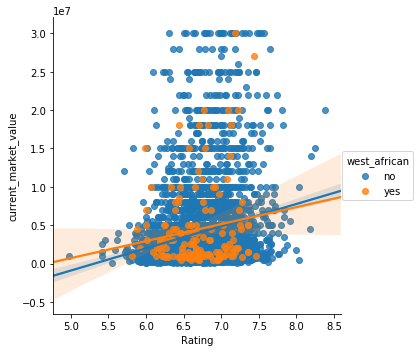

In [57]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_adjusted)

In [58]:
df_st_adj = df_adjusted[df_adjusted.Position.isin(striker)]

In [59]:
df_st_adj.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,1132.000000,31.000000,1.135000e+03,1.135000e+03,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,...,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,1.801396,9.661290,4.449934e+06,6.925101e+06,0.430211,0.127436,0.228925,0.008802,1.513040,73.719295,...,1.210396,0.835242,18.291982,0.326784,0.628899,0.043436,0.519912,0.114273,0.883172,17.187665
std,0.064598,1.171801,5.421040e+06,7.846852e+06,0.542073,0.187883,0.416174,0.048621,0.912343,9.352286,...,0.744313,0.594189,10.154684,0.481863,0.774888,0.089623,0.487127,0.141947,0.609282,4.131761
min,1.600000,7.500000,7.500000e+04,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.750000,9.000000,1.000000e+06,2.000000e+06,0.070000,0.000000,0.000000,0.000000,0.900000,68.350000,...,0.700000,0.400000,11.250000,0.000000,0.200000,0.000000,0.200000,0.000000,0.400000,14.000000
50%,1.800000,9.500000,2.500000e+06,4.000000e+06,0.310000,0.070000,0.130000,0.000000,1.400000,74.700000,...,1.100000,0.800000,17.000000,0.100000,0.400000,0.000000,0.400000,0.100000,0.800000,17.000000
75%,1.850000,10.000000,5.000000e+06,9.000000e+06,0.560000,0.200000,0.290000,0.000000,2.000000,79.850000,...,1.700000,1.100000,23.100000,0.400000,0.800000,0.100000,0.700000,0.200000,1.250000,20.000000
max,2.030000,13.000000,3.000000e+07,6.500000e+07,4.550000,2.370000,4.220000,0.680000,5.600000,100.000000,...,5.100000,3.900000,101.100000,3.100000,8.400000,1.000000,3.600000,1.000000,3.900000,34.000000


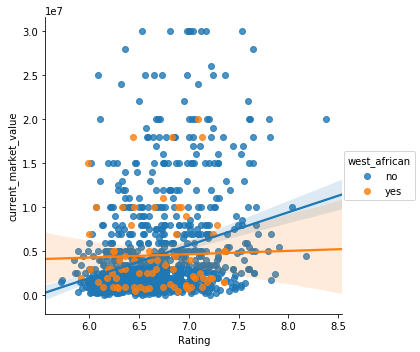

In [60]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="west_african", data=df_st_adj)

In [61]:
df_st_adj['Rating'].corr(df_st_adj['current_market_value'])

0.2685560034722535

In [62]:
df_st_adj['GpG'].corr(df_st_adj['current_market_value'])

0.16387116580139549

In [63]:
df_st_adj['SpG'].corr(df_st_adj['current_market_value'])

0.20218063694303842

In [64]:
df_st_adj['GpG'].corr(df_st_adj['current_market_value'])

0.16387116580139549

In [65]:
df_st_adj['SpG'].corr(df_st_adj['current_market_value'])

0.20218063694303842

In [66]:
df_wa_st_adj = df_st_adj[df_st_adj.country_of_birth.isin(wa_country_list)]

In [67]:
df_wa_st_adj.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,48.000000,0.0,4.800000e+01,4.800000e+01,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.805417,NaN,4.497917e+06,6.233333e+06,0.537917,0.084167,0.27000,0.002292,1.662500,72.233333,...,1.552083,0.727083,17.483333,0.164583,0.522917,0.033333,0.447917,0.145833,1.064583,17.520833
std,0.059536,NaN,4.520391e+06,5.612669e+06,0.590366,0.111810,0.37209,0.011155,0.846426,8.654069,...,0.803712,0.480576,8.278409,0.262143,0.503705,0.075324,0.333894,0.150118,0.629248,4.542891
min,1.720000,NaN,4.000000e+05,1.000000e+06,0.000000,0.000000,0.00000,0.000000,0.200000,49.000000,...,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,1.760000,NaN,1.237500e+06,2.000000e+06,0.185000,0.000000,0.00000,0.000000,1.000000,67.300000,...,1.000000,0.375000,10.775000,0.000000,0.100000,0.000000,0.200000,0.000000,0.700000,14.000000
50%,1.800000,NaN,3.000000e+06,4.000000e+06,0.405000,0.000000,0.10000,0.000000,1.700000,74.350000,...,1.400000,0.700000,17.050000,0.100000,0.400000,0.000000,0.400000,0.100000,1.000000,17.000000
75%,1.842500,NaN,6.250000e+06,1.000000e+07,0.637500,0.135000,0.35500,0.000000,2.100000,77.950000,...,2.125000,0.925000,22.200000,0.200000,0.825000,0.000000,0.600000,0.200000,1.400000,20.250000
max,1.980000,NaN,2.000000e+07,2.200000e+07,2.630000,0.340000,1.64000,0.060000,3.900000,89.700000,...,3.400000,2.200000,34.600000,1.500000,2.500000,0.300000,1.500000,0.500000,3.000000,27.000000


In [68]:
df_wa_st_adj['Rating'].corr(df_wa_st_adj['current_market_value'])

-0.064748571529455512

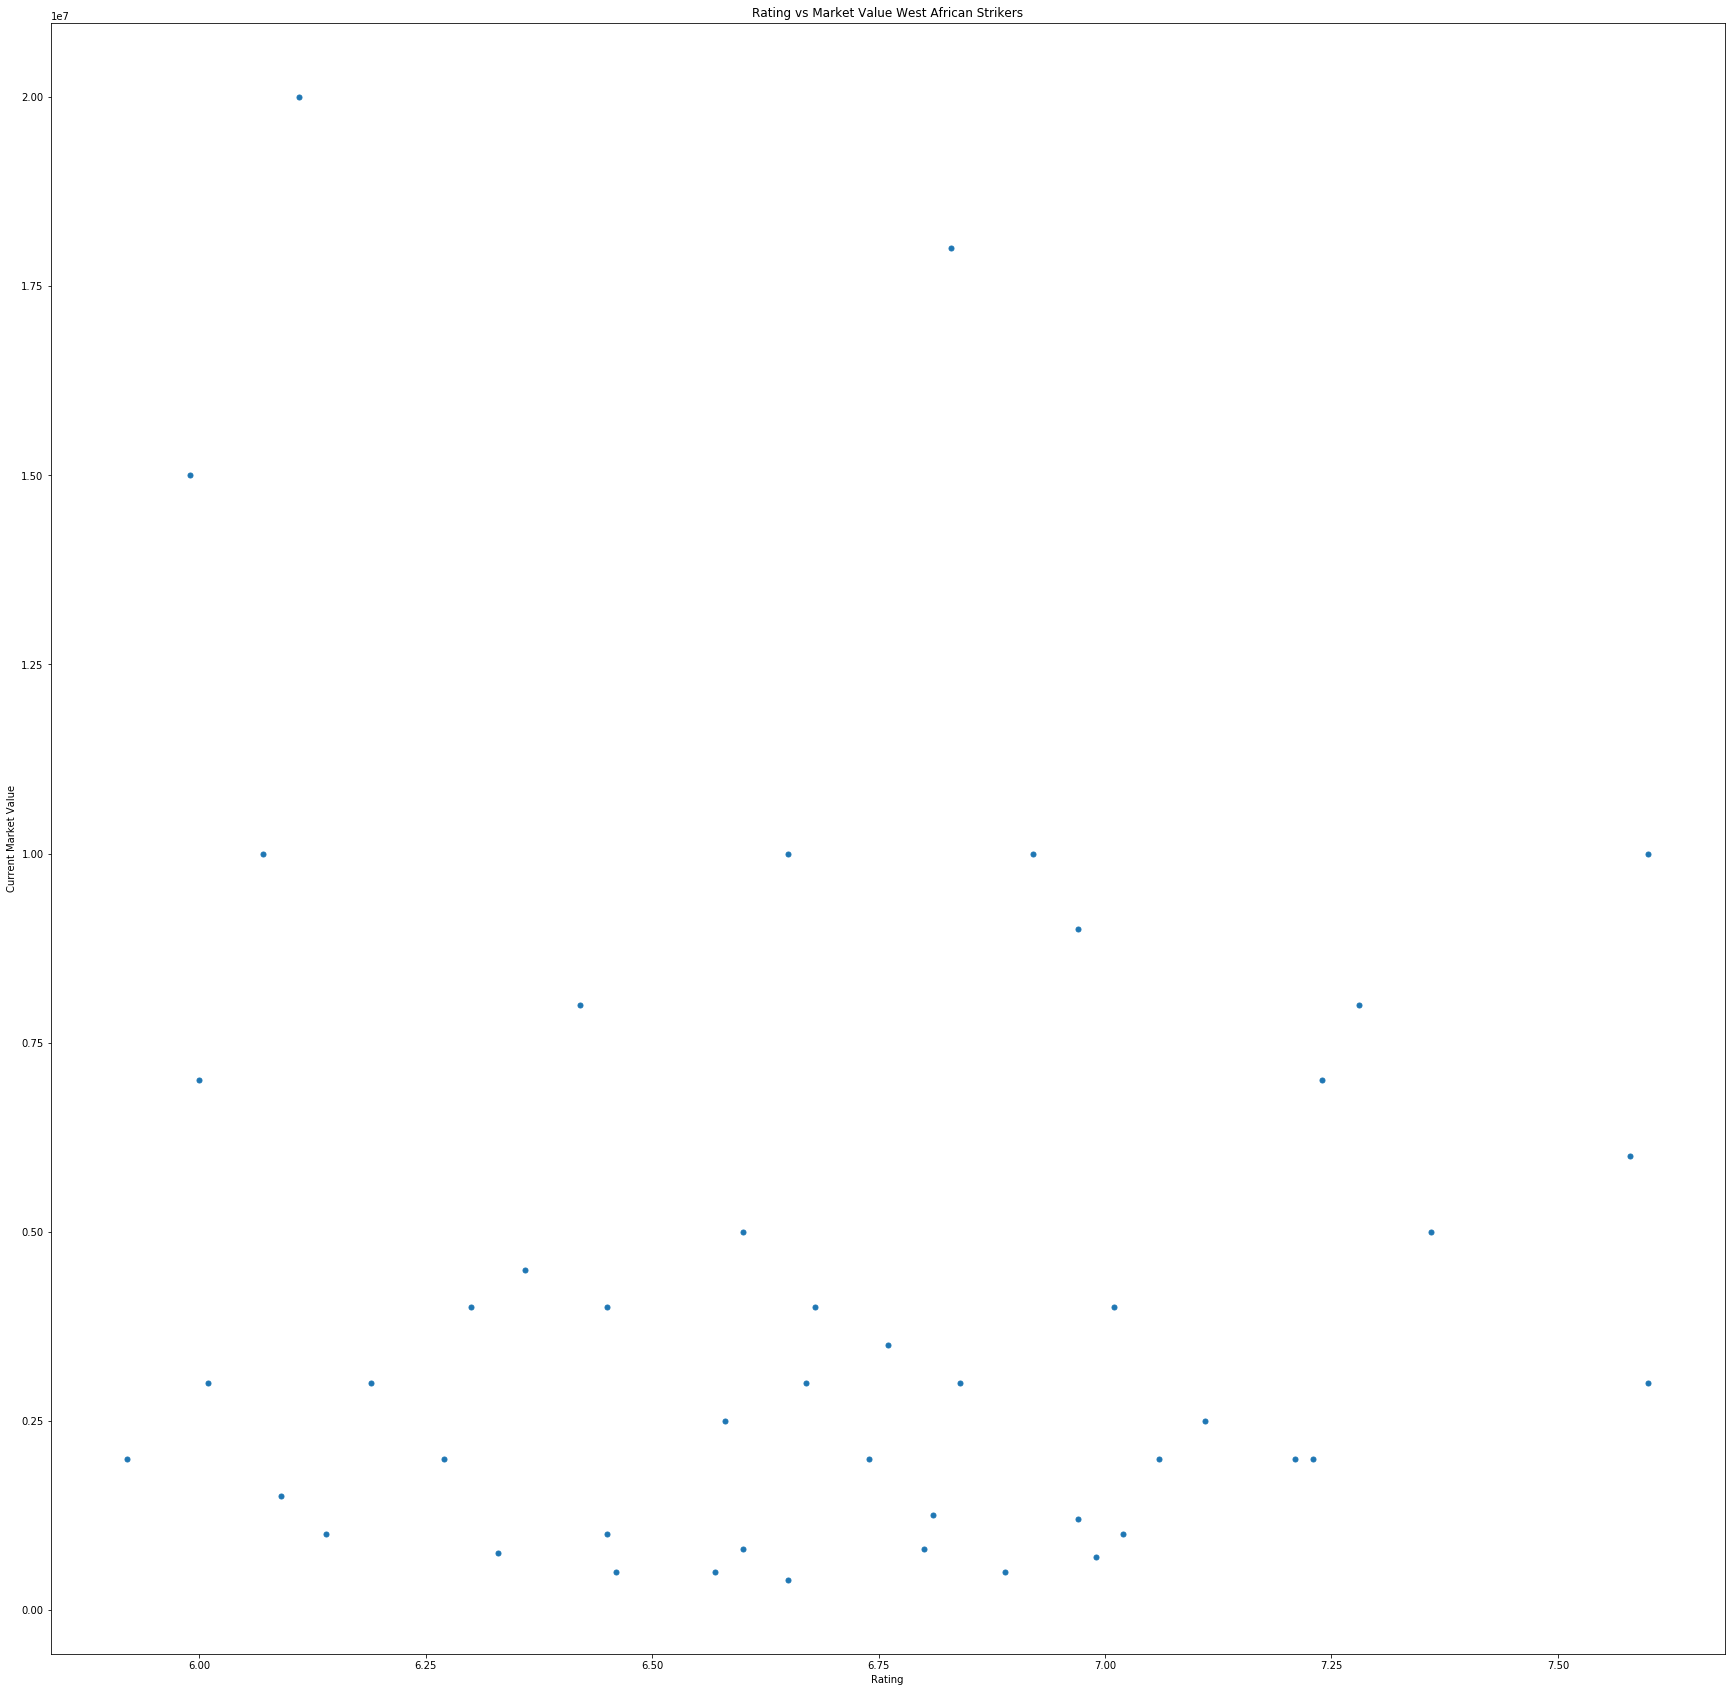

In [69]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_wa_st_adj, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value West African Strikers')
plt.show()

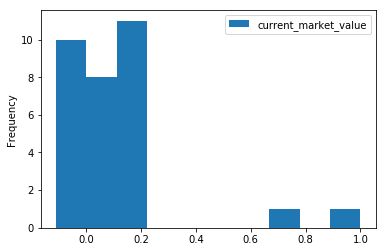

In [70]:
df_corr = df_adjusted.corr()
df_corr[['current_market_value']].plot(kind='hist')

In [71]:
print(df_corr)

                        Height  Shoe.size  current_market_value  \
Height                1.000000   0.760877              0.018665   
Shoe.size             0.760877   1.000000             -0.109370   
current_market_value  0.018665  -0.109370              1.000000   
highest_market_value  0.009763  -0.066065              0.764243   
GpG                  -0.049257  -0.154610              0.138610   
Assists/90min        -0.184566  -0.226253              0.125079   
Yel/90min            -0.028348  -0.049542             -0.033688   
Red/90min             0.008164  -0.108409             -0.025204   
SpG                  -0.162635  -0.189478              0.153162   
PS%                  -0.181692  -0.055431              0.176973   
Rating                0.026806   0.041461              0.204973   
Tackles              -0.125429  -0.007340              0.000826   
Inter                 0.065464   0.156323             -0.043081   
Fouls (def)          -0.060632  -0.075979             -0.02249

In [72]:
df_corr_st = df_st_adj.corr()

In [73]:
print(df_corr_st)

                        Height  Shoe.size  current_market_value  \
Height                1.000000   0.606557              0.012516   
Shoe.size             0.606557   1.000000             -0.154300   
current_market_value  0.012516  -0.154300              1.000000   
highest_market_value  0.022806  -0.052634              0.731396   
GpG                   0.137898   0.001450              0.163871   
Assists/90min        -0.070260  -0.113932              0.161855   
Yel/90min             0.022739  -0.052238             -0.036313   
Red/90min             0.019949        NaN             -0.033418   
SpG                   0.081108  -0.208031              0.202181   
PS%                  -0.313999  -0.197331              0.151058   
Rating               -0.055512  -0.289781              0.268556   
Tackles              -0.206305  -0.451558             -0.011568   
Inter                -0.176864  -0.366555              0.010861   
Fouls (def)           0.186673  -0.256420             -0.06211

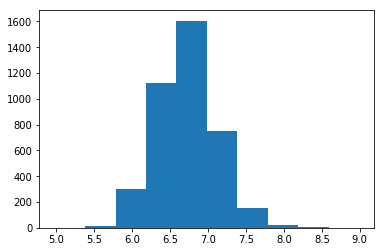

In [74]:
plt.hist(df['Rating'])
plt.show()

In [75]:
df_new = df[(df['Rating'] > 5.5) & (df['Rating'] < 7.5)]

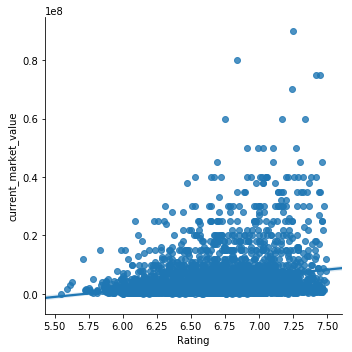

In [76]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_new)

In [77]:
#maybe correlation exists at some level of aggregation
#avg=df.groupby(['binned_values']).mean()
#avg=df_x.groupby
#repeat analysis
#cw_bins= [5.2, 5.4, etc, 6, 6.5, 7, 7.5, 8, 8.5]
#df_x['binned_values'] =np.digitize(df_x.Rating.values, bins=cs_bins)
#then use the w africa or no hue
#use sts.pearsonr(avg['binned_values'], Avg['current_market_value])
#pearson is more accurate than reg correlation

In [78]:
#look at data from top 15 clubs and see what data looks like for these 
#repeat the same analysis but limit to top 15 clubs

In [79]:
#using original data frame (put these up top) 
#rat_bins=[5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]
#df['binned_values'] = np.digitize(df.Rating.values, bins=rat_bins)   

In [80]:
Avg=df.groupby(['binned_values','west_african'], as_index=False)['current_market_value'].mean()

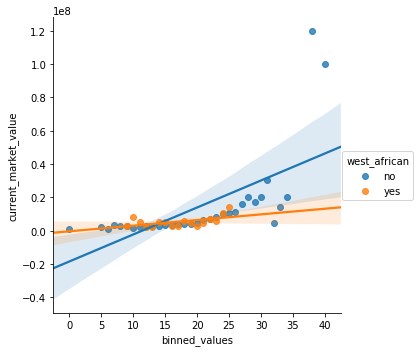

In [81]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="west_african",data=Avg)
plt.show()

In [82]:
Avg.head()

,binned_values,west_african,current_market_value
0,0,no,1.000000e+06
1,5,no,2.000000e+06
2,6,no,9.500000e+05
3,7,no,3.500000e+06
4,8,no,2.883333e+06


In [83]:
sp.pearsonr(Avg['binned_values'], Avg['current_market_value'])

(0.6340167624478128, 7.6925796148142299e-07)

In [84]:
#df_wa['Rating'].corr(df_wa['current_market_value'])
#sp.pearsonr(Avg['binned_values'], Avg['current_market_value'])
Avg_wa = Avg[Avg['west_african'] == 'yes']

In [85]:
sp.pearsonr(Avg_wa['binned_values'], Avg_wa['current_market_value'])

(0.53713631408665641, 0.026188106228610841)

In [86]:
Avg_nwa = Avg[Avg['west_african'] == 'no']

In [87]:
sp.pearsonr(Avg_nwa['binned_values'], Avg_nwa['current_market_value'])

(0.64480337031061874, 5.1101317101921006e-05)

In [88]:
#let's assume the 15 most valuable clubs are the best at valuing talent
#maybe they have the most information, the most resources to find out
#According to forbes, Manchester United, Barcelona, Real Madrid, Bayern Munich, 
#Manchester City, Arsenal, Chelsea, Liverpool, Juventus, Tottenham Hotspur, 
#Paris Saint-Germain, Borussia Dortmund, AC Milan, Atletico de Madrid, West Ham United

In [89]:
top_teams = ['Manchester United', 'FC Barcelona', 'Real Madrid', 'Bayern Munich', 
'Manchester City', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC', 'Juventus FC', 'Tottenham Hotspur', 
'Paris Saint-Germain', 'Borussia Dortmund', 'AC Milan', 'Atletico Madrid', 'West Ham United']
df_tt = df[df.current_club.isin(top_teams)]


In [90]:
df_tt.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values
2355,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,0.1,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13
204,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker,both,Chelsea FC,...,0.1,8.6,0.0,0.1,0.0,0.3,0.2,0.6,no,16
326,Raphael Guerreiro,"Dec 22, 1993","Le Blanc-Mesnil, France",23,1.70,8.0,"Portugal, France",Defender,left,Borussia Dortmund,...,1.0,32.0,1.3,1.7,0.0,0.0,0.0,0.3,no,17
8,Robert Lewandowski,"Aug 21, 1988","Warszawa, Poland",29,1.84,NaN,Poland,Striker,right,Bayern Munich,...,1.3,22.5,0.1,0.5,0.0,1.1,0.4,2.7,no,27
2602,Borja Mayoral,"Apr 5, 1997","Parla, Spain",20,1.83,NaN,Spain,Striker,right,Real Madrid,...,0.4,6.0,0.0,0.3,0.0,0.0,0.3,0.5,no,14


In [91]:
Avg_tt=df_tt.groupby(['binned_values','west_african'], as_index=False)['current_market_value'].mean()

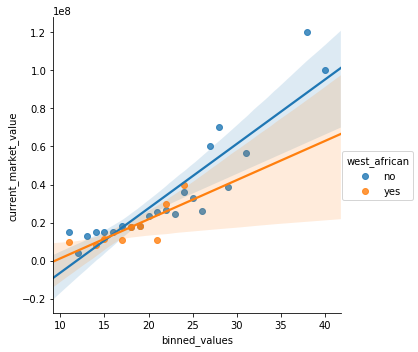

In [92]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="west_african",data=Avg_tt)
plt.show()

In [93]:
sp.pearsonr(Avg_tt['binned_values'], Avg_tt['current_market_value'])

(0.9036667854255479, 3.3629158339354223e-12)

In [94]:
df_tt.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values
count,298.000000,19.000000,2.980000e+02,2.980000e+02,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,1.822450,9.763158,2.345570e+07,2.767030e+07,0.340436,0.137852,0.219128,0.008154,1.057718,83.054362,...,0.721141,0.813758,40.225168,0.317114,2.425839,0.059060,0.414094,0.077852,0.570134,19.895973
std,0.066629,1.284182,1.864761e+07,1.926513e+07,0.540307,0.183232,0.311385,0.031188,1.051129,8.072454,...,0.661232,0.701306,19.972038,0.445716,1.987614,0.128715,0.479410,0.128627,0.676354,4.191452
min,1.650000,8.000000,9.000000e+05,1.500000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,45.300000,...,0.000000,0.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.770000,8.750000,1.000000e+07,1.500000e+07,0.000000,0.000000,0.000000,0.000000,0.400000,79.275000,...,0.200000,0.300000,24.325000,0.000000,0.900000,0.000000,0.000000,0.000000,0.100000,17.000000
50%,1.830000,9.500000,1.800000e+07,2.500000e+07,0.130000,0.080000,0.150000,0.000000,0.700000,84.500000,...,0.600000,0.650000,37.500000,0.100000,1.900000,0.000000,0.300000,0.000000,0.400000,20.000000
75%,1.870000,11.000000,3.000000e+07,3.500000e+07,0.447500,0.230000,0.290000,0.000000,1.500000,88.875000,...,1.000000,1.200000,54.725000,0.500000,3.700000,0.100000,0.600000,0.100000,0.800000,23.000000
max,1.990000,12.000000,1.200000e+08,1.200000e+08,4.550000,1.010000,3.100000,0.240000,7.000000,100.000000,...,3.500000,3.800000,101.200000,2.600000,10.600000,1.300000,2.800000,0.800000,4.800000,40.000000


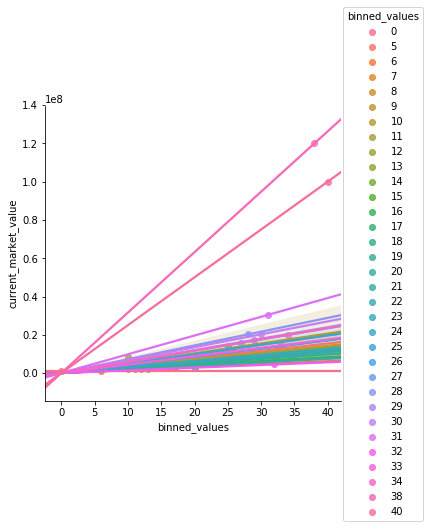

In [95]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="binned_values",data=Avg)
plt.show()

In [96]:
#Avg_cs=df.groupby(['binned_values','continent_specific'], as_index=False)['current_market_value'].mean()

In [97]:
#g = sns.lmplot(x="binned_values", y="current_market_value", hue="west_african",data=Avg_tt)
#plt.show()

In [115]:
df_wa_t = df_adjusted[df_adjusted['west_african'] == 'yes']

In [116]:
df_wa_t.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values
667,Asamoah Gyan,"Nov 22, 1985","Accra, Ghana",31,1.80,NaN,Ghana,Striker,right,Kayserispor,...,0.4,7.0,0.2,0.4,0.0,0.2,0.2,1.0,yes,14
1209,Henry Onyekuru,"Jun 5, 1997","Onitsha, Nigeria",20,1.75,NaN,Nigeria,Striker,both,RSC Anderlecht,...,0.8,20.0,0.0,0.0,0.0,0.0,0.0,1.0,yes,11
530,Eder,"Dec 22, 1987","Bissau, Guinea-Bissau",29,1.88,NaN,"Portugal, Guinea-Bissau",Striker,both,Lokomotiv Moscow,...,0.3,5.4,0.1,0.0,0.0,0.3,0.0,0.4,yes,13
2245,Kalifa Coulibaly,"Aug 21, 1991","Bamako, Mali",26,1.97,NaN,Mali,Striker,right,FC Nantes,...,0.3,7.5,0.0,0.3,0.0,0.0,0.0,0.3,yes,14
687,Diafra Sakho,"Dec 24, 1989","Guediawaye, Senegal",27,1.84,NaN,"Senegal, France",Striker,right,West Ham United,...,0.1,3.3,0.1,0.1,0.0,0.0,0.1,0.4,yes,11


In [117]:
df_wa_tt = df_wa_t['current_market_value']              
df_wa_tt.describe()

count    1.530000e+02
mean     4.445098e+06
std      5.368965e+06
min      4.000000e+05
25%      1.000000e+06
50%      2.000000e+06
75%      5.000000e+06
max      3.000000e+07
Name: current_market_value, dtype: float64

In [118]:
df_nwa_t = df_adjusted[df_adjusted['west_african'] == 'no']

In [119]:
df_nwa_t.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values
2355,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,0.1,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13
3418,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,1.3,14.0,0.0,0.0,0.0,0.3,0.0,0.7,no,13
1599,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,0.0,3.3,0.0,0.3,0.0,0.5,0.0,0.0,no,10
2880,Tornike Okriashvili,"Feb 12, 1992","Tiflis, Georgia",25,1.81,NaN,Georgia,Midfielder,both,FK Krasnodar,...,0.0,6.7,0.0,0.3,0.0,0.3,0.3,0.0,no,13
2101,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,0.3,6.8,0.0,0.0,0.0,0.0,0.3,0.8,no,16


In [120]:
df_nwa_tt = df_nwa['current_market_value']

In [121]:
df_nwa_tt.head()

2355    3000000.0
3418    1000000.0
1599    1500000.0
2880    1500000.0
2101    3500000.0
Name: current_market_value, dtype: float64

In [122]:
df_nwa_tt.describe()

count    3.823000e+03
mean     4.899308e+06
std      8.490576e+06
min      5.000000e+04
25%      1.000000e+06
50%      2.000000e+06
75%      5.000000e+06
max      1.200000e+08
Name: current_market_value, dtype: float64

In [124]:
ttest_ind(df_nwa_tt, df_wa_tt)

Ttest_indResult(statistic=0.65642776388096524, pvalue=0.51158693815095413)